In [67]:
import matplotlib
matplotlib.use('TkAgg')

ModuleNotFoundError: No module named '_tkinter'

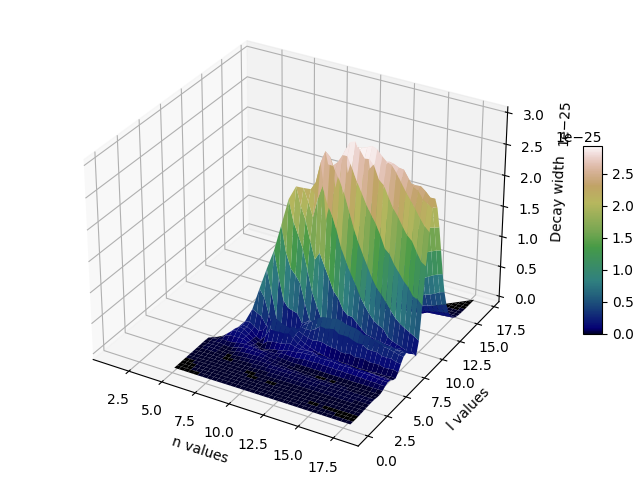

In [75]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from scipy.interpolate import griddata
%matplotlib widget


X = [1,1,1,1,1,1,50,50,50,50,50,50]
Y = [3,5,7,8,9,10,3,5,7,8,9,10]
Z = [5.23,3.11,17.54,0.93,40.11,10.15,1.47,14.32,5.46,55.93,40.8,10.2]

#points = np.array([X, Y]).T
points = np.array([x, y]).T

# create a grid of coordinates between the minimum and
# maximum of your X and Y. 50j indicates 50 discretization
# points between the minimum and maximum.
X_grid, Y_grid = np.mgrid[1:18:50j, 0:17:50j]
# interpolate your values on the grid defined above
Z_grid = griddata(points, tp1, (X_grid, Y_grid), method='cubic')

fig = plt.figure(constrained_layout=True)
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('n values')
ax.set_ylabel('l values')
ax.set_zlabel('Decay width')
#ax.set_zscale('log')

surf = ax.plot_surface(X_grid, Y_grid, Z_grid,cmap=cm.gist_earth,#cm.coolwarm, 
                       linewidth=0, antialiased=True)
fig.colorbar(surf, shrink=0.4, aspect=10)
#plt.show()

In [62]:
get_ipython().run_line_magic('matplotlib', 'widget')
plt.close('all')

In [14]:
import pandas
 
# reading the CSV file
csvFile = pandas.read_csv('geek.csv')
 
# displaying the contents of the CSV file
print(csvFile)

      5   0  3.630210622827083e-29
0     5   1           5.425310e-29
1     5   2           8.225599e-29
2     5   3           6.382598e-29
3     5   4           2.067476e-29
4     6   0           2.674932e-29
..   ..  ..                    ...
155  18  13           3.085944e-26
156  18  14           4.644166e-27
157  18  15           3.935057e-28
158  18  16           1.744949e-29
159  18  17           3.136261e-31

[160 rows x 3 columns]


In [1]:
import csv
  
x = []
y = []
tp1 = []  
with open('geek.csv','r') as csvfile:
    plots = csv.reader(csvfile, delimiter = ',')
      
    for row in plots:
        x.append(int(row[0]))
        y.append(int(row[1]))
        tp1.append(float(row[2]))

In [3]:
max(tp1)

2.9898182192076546e-25

In [130]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
# Read data from a csv
#z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')
z = Z_grid/10**-25
sh_0, sh_1 = z.shape
#x, y = np.linspace(0, 1, sh_0), np.linspace(0, 1, sh_1)
x, y = X_grid, Y_grid
fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
# fig.update_layout(title='Decay width', autosize=False,
#                   scene = dict(
#                     xaxis_title='n values',
#                     yaxis_title='l values',
#                     zaxis_title='Decay width 1e-25'),width=600, height=500,
#                   margin=dict(l=65, r=50, b=65, t=90))

fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout(title='Decay width for transition from (17,16)→(n,l) to different states', autosize=False,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                  scene = dict(
                    xaxis_title='n values',
                    yaxis_title='l values',
                    zaxis_title='Decay width 1e-25'),width=600, height=500,
                  margin=dict(l=65, r=50, b=65, t=90)
)
fig.show()



In [124]:
# import os

# if not os.path.exists("images"):
#     os.mkdir("images")
import plotly
import plotly.express as px
#plotly.offline.iplot(fig, validate=False)
pio.write_image(fig, 'fig1.jpeg', format='png',validate=False, engine='kaleido')
#image.save('image.png')
#plotly.export(p = fig, #the graph to export
#               file = "graph 1.png")
#pio.write_image(fig, "op.png")
#plotly.write_image
# from IPython.display import Image
# import plotly.io as pio
# img_bytes = pio.to_image(fig, format='png')
# Image(img_bytes)
# from IPython.display import Image
# Image(filename="screenshot.png")

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [121]:
import plotly.io as pio
# pio.write_image(fig,'/Users/na/Dropbox/Mac/Downloads/Form\ Factor/images\fig1','png')
#conda install -c plotly plotly-orca psutil

In [ ]:
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout(title='Mt Bruno Elevation', autosize=False,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90)
)